# Covid-19 symptoms Prediction with Machine Learning

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
Covid = pd.read_csv('covid-19_symptomsv1.csv')


#### To get the First 5 of the data frame


In [3]:
Covid.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0


#### To get the last 5 of the data frame

In [4]:
Covid.tail()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
2570,99,0,90,0,0,1
2571,100,0,53,0,-1,1
2572,101,0,44,1,0,0
2573,102,0,97,0,-1,1
2574,104,1,62,1,-1,1


In [5]:
Covid.index

RangeIndex(start=0, stop=2575, step=1)

## Check data for missing data before putting for model prediction

In [6]:
Covid.isnull().sum()

fever            0
bodyPain         0
age              0
runnyNose        0
diffBreath       0
infectionProb    0
dtype: int64

In [7]:
Covid.info

<bound method DataFrame.info of       fever  bodyPain  age  runnyNose  diffBreath  infectionProb
0       102         0    9          0          -1              0
1       102         0   10          0           0              1
2       104         0   33          1          -1              0
3       101         1   59          0           1              0
4        99         0   98          0           0              0
...     ...       ...  ...        ...         ...            ...
2570     99         0   90          0           0              1
2571    100         0   53          0          -1              1
2572    101         0   44          1           0              0
2573    102         0   97          0          -1              1
2574    104         1   62          1          -1              1

[2575 rows x 6 columns]>

In [8]:
Covid.dtypes

fever            int64
bodyPain         int64
age              int64
runnyNose        int64
diffBreath       int64
infectionProb    int64
dtype: object

### Slicing the data frame in pythons

In [9]:
Covid[Covid.columns[-2:]]

,diffBreath,infectionProb
0,-1,0
1,0,1
2,-1,0
3,1,0
4,0,0
...,...,...
2570,0,1
2571,-1,1
2572,0,0
2573,-1,1


In [10]:
Covid[Covid.columns[-1:]]

,infectionProb
0,0
1,1
2,0
3,0
4,0
...,...
2570,1
2571,1
2572,0
2573,1


In [11]:
check1=Covid[Covid.columns[-4]]

In [12]:
check1

0        9
1       10
2       33
3       59
4       98
        ..
2570    90
2571    53
2572    44
2573    97
2574    62
Name: age, Length: 2575, dtype: int64

In [13]:
check2=Covid[Covid.columns[2]]

In [14]:
check2

0        9
1       10
2       33
3       59
4       98
        ..
2570    90
2571    53
2572    44
2573    97
2574    62
Name: age, Length: 2575, dtype: int64

##### The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

##### What question(s) are you trying to solve?
##### What kind of data do we have and how do we treat different types?
#####  What's missing from the data and how do you deal with it?
#####  Where are the outliers and why should you care about them?
#####  How can you add, change or remove features to get more out of your data?

In [15]:
Cov = Covid.iloc[:, :-1]
IID = Covid.iloc[:, -1]

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Cov, IID)

C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

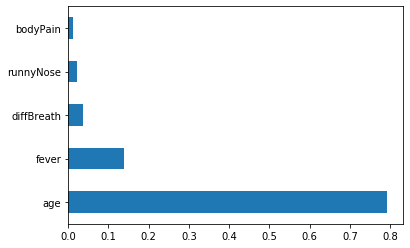

In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Cov.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#### From the feature importance score visualization show that top 3 attributes will be age, fever and difficulty in breathing.

### Feature Importance with Random Forest

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
data = Covid.copy()

In [20]:
data

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0
...,...,...,...,...,...,...
2570,99,0,90,0,0,1
2571,100,0,53,0,-1,1
2572,101,0,44,1,0,0
2573,102,0,97,0,-1,1


In [21]:
X = Covid.iloc[:, :-1].values
y = Covid.iloc[:, -1].values

In [22]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X, y)

C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

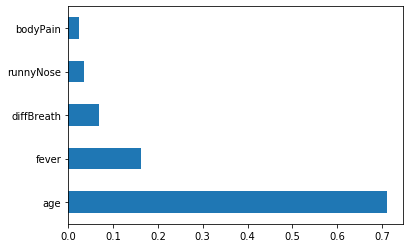

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Cov.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()